# **Step 1: Set Up the Environment**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
# Load the datasets
file_paths = {
    "all_data_1": "all_data1.csv",
    "all_data_2": "all_data2.csv",
    "all_data_3": "all_data3.csv",
    "all_data_4": "all_data4.csv",
    "all_data_5": "all_data5.csv",
    "all_data_6": "all_data6.csv",
    "all_data_7": "all_data7.csv",
    "all_data_8": "all_data8.csv",
    "all_data_9": "all_data9.csv",
    "all_data_10": "all_data10.csv",
    "all_data_11": "all_data11.csv",
    "all_data_12": "all_data12.csv",
    "all_data_13": "all_data13.csv",
    "all_data_14": "all_data14.csv",
    "all_data_15": "all_data15.csv",
    "all_data_16": "all_data16.csv",
    "all_data_17": "all_data17.csv",
    "all_data_18": "all_data18.csv",
    "all_data_19": "all_data19.csv",
    "all_data_20": "all_data20.csv",
    "all_data_21": "all_data21.csv",
    "all_data_22": "all_data22.csv",
    "all_data_23": "all_data23.csv",
    "all_data_24": "all_data24.csv",
    "all_data_25": "all_data25.csv",
    "all_data_26": "all_data26.csv",
    "all_data_27": "all_data27.csv",
    "all_data_28": "all_data28.csv",
    "all_data_29": "all_data29.csv",
    "all_data_30": "all_data30.csv",
    "all_data_31": "all_data31.csv",
    "all_data_32": "all_data32.csv",
    "all_data_33": "all_data33.csv",
    "all_data_34": "all_data34.csv",
    "all_data_35": "all_data35.csv",
    "all_data_36": "all_data36.csv",
    "all_data_37": "all_data37.csv",
    "all_data_38": "all_data38.csv",
    "all_data_39": "all_data39.csv",
    "all_data_40": "all_data40.csv",
    "all_data_41": "all_data41.csv",
    "all_data_42": "all_data42.csv"
}

In [3]:
# Load the datasets into pandas DataFrames
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# **Step 2: Preprocessing**

❗❗❗ **Do not forget to change the sensor_columns (depends on the dataset)!** ❗❗❗

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [7]:
# Combine datasets
combined_data = pd.concat([datasets[f"all_data_{i}"] for i in range(1, 43)], ignore_index=True)

# Filter out noise
filtered_data = combined_data[combined_data["Letter"] != "noise"]

# Define sensor columns
sensor_columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'Mag_X', 'Mag_Y', 'Mag_Z', 'Force1', 'Force2', 'Force3']

# Normalize sensor data (Z-score normalization)
scaler = StandardScaler()
filtered_data[sensor_columns] = scaler.fit_transform(filtered_data[sensor_columns])

<ipython-input-7-575800d582c7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[sensor_columns] = scaler.fit_transform(filtered_data[sensor_columns])


In [8]:
# Function to group data into sequences by label
def create_sequences(data):
    sequences = []
    labels = []
    current_label = None
    current_sequence = []

    for _, row in data.iterrows():
        if row["Letter"] != current_label:
            # Save the current sequence if it's not empty
            if current_sequence:
                sequences.append(np.array(current_sequence))
                labels.append(current_label)
            # Start a new sequence
            current_label = row["Letter"]
            current_sequence = []

        # Append sensor values to the current sequence
        current_sequence.append(row[sensor_columns].values)

    # Save the final sequence
    if current_sequence:
        sequences.append(np.array(current_sequence))
        labels.append(current_label)

    return np.array(sequences, dtype=object), labels

In [9]:
# prompt: shape of sequences and labels

# Create sequences and labels
sequences, labels = create_sequences(filtered_data)

# Print the shapes
print("Sequences shape:", sequences.shape)
print("Labels shape:", len(labels))

for seq, label in zip(sequences, labels):
    print(f"Sequence Shape: {seq.shape}, Label: {label}")


Sequences shape: (6827,)
Labels shape: 6827
Sequence Shape: (27, 12), Label: A
Sequence Shape: (22, 12), Label: B
Sequence Shape: (16, 12), Label: C
Sequence Shape: (20, 12), Label: D
Sequence Shape: (25, 12), Label: E
Sequence Shape: (21, 12), Label: F
Sequence Shape: (22, 12), Label: G
Sequence Shape: (21, 12), Label: H
Sequence Shape: (18, 12), Label: I
Sequence Shape: (17, 12), Label: J
Sequence Shape: (19, 12), Label: K
Sequence Shape: (14, 12), Label: L
Sequence Shape: (21, 12), Label: M
Sequence Shape: (17, 12), Label: N
Sequence Shape: (15, 12), Label: O
Sequence Shape: (20, 12), Label: P
Sequence Shape: (20, 12), Label: Q
Sequence Shape: (26, 12), Label: R
Sequence Shape: (17, 12), Label: S
Sequence Shape: (16, 12), Label: T
Sequence Shape: (16, 12), Label: U
Sequence Shape: (15, 12), Label: V
Sequence Shape: (17, 12), Label: W
Sequence Shape: (19, 12), Label: X
Sequence Shape: (16, 12), Label: Y
Sequence Shape: (20, 12), Label: Z
Sequence Shape: (20, 12), Label: a
Sequence Sh

In [11]:
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create sequences and labels
sequences, labels = create_sequences(filtered_data)

# Map labels to integer indices
unique_labels = list(set(labels))
max_label_length = max([len(label) for label in unique_labels])
characters = set(char for label in unique_labels for char in label)

print("max_label_length: ", max_label_length)

# Define a blank token (typically represented as an empty string or a special character)
blank_token = 'BLANK'

# Update the StringLookup layers with the extended vocabulary
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None, oov_token=blank_token
)

num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

# Map labels to integer indices, including the blank token where needed
labels = [char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8")) for label in labels]

# Verify the vocabulary including the blank index
print(f"Vocabulary: {char_to_num.get_vocabulary()}")
print(f"Blank token index: {char_to_num(blank_token).numpy()}")

# Pad the labels with a safe padding value, e.g., -1
padded_labels = pad_sequences(labels, maxlen=max_label_length, padding='post', value=-1)

# Convert to a TensorFlow tensor and replace -1 with the CTC blank index (0)
padded_labels = tf.where(padded_labels == -1, tf.cast(0, tf.int32), tf.convert_to_tensor(padded_labels, dtype=tf.int32))

print(f"Padded Labels Shape: {padded_labels.shape}")  # Expected: (batch_size, max_label_length)

max_label_length:  23
Vocabulary: ['BLANK', '0', 'J', 'b', ')', '$', '?', '≥', '(', 'λ', '!', 'M', 'u', 'v', '±', '÷', '∏', 'G', 'Q', 'X', '√', '∇', 'p', 'N', 'O', 'g', ';', '∑', 'D', 'Y', '{', '∜', 'd', 'T', '7', '.', 'o', 'ω', 'r', '8', 'μ', '`', '5', '}', 'L', 'A', 'S', '&', '≠', '[', 'n', '*', '<', 'W', '=', '"', 't', '6', ' ', '%', 'π', '∮', '~', '∀', 'θ', '+', 'P', '2', '#', 'a', '∫', ':', '3', 'e', '∛', 'C', 'f', 'm', 'Z', '1', '∓', '≤', 'h', '@', 'z', 'i', 'E', 'H', '€', 's', '9', ',', 'I', 'F', 'y', '>', 'K', 'w', 'q', 'B', 'U', 'l', 'x', '4', '^', '∆', '∉', 'R', '-', 'V', '∞', 'j', "'", '∈', '/', ']', 'c', '∂', 'k', '£', '∋', '≈', '|', '∃']
Blank token index: 0
Padded Labels Shape: (6827, 23)


In [12]:
# Define padding parameters
max_length = max([len(seq) for seq in sequences])  # Longest sequence
min_length = 0  # Minimum acceptable length for sequences

# Filter out very short sequences
filtered_sequences = [seq for seq in sequences if seq.shape[0] >= min_length]
filtered_labels = [label for seq, label in zip(sequences, padded_labels) if seq.shape[0] >= min_length]

# Pad sequences to the same length
padded_sequences = pad_sequences(filtered_sequences, maxlen=max_length, padding='post', dtype='float32', value=0)

# Verify the new shapes
print(f"Padded Sequences Shape: {padded_sequences.shape}")
print(f"Filtered Labels Count: {len(filtered_labels)}")

print("Max length: ", max_length)


Padded Sequences Shape: (6827, 182, 12)
Filtered Labels Count: 6827
Max length:  182


In [13]:
import tensorflow as tf
import random

def split_data(sequences, labels, train_size=0.7, shuffle=True):
    # Get dataset size
    size = tf.shape(sequences)[0].numpy()  # Get number of sequences

    # Create indices using TensorFlow's range
    indices = list(range(size))  # Using Python list to avoid TensorFlow slicing issues

    if shuffle:
        random.shuffle(indices)  # Shuffle indices in-place using Python

    # Calculate training set size
    train_samples = int(size * train_size)

    # Convert indices to TensorFlow tensors for tensor slicing
    train_idx = tf.convert_to_tensor(indices[:train_samples])
    valid_idx = tf.convert_to_tensor(indices[train_samples:])

    # Slice sequences properly using TensorFlow
    x_train = tf.gather(sequences, train_idx)
    x_valid = tf.gather(sequences, valid_idx)

    # Slice labels (which are lists of tensors) using Python indexing
    y_train = [labels[i] for i in indices[:train_samples]]
    y_valid = [labels[i] for i in indices[train_samples:]]

    return x_train, x_valid, y_train, y_valid

# Ensure padded_sequences is a TensorFlow tensor
padded_sequences_tensor = tf.convert_to_tensor(padded_sequences)

# Apply the fixed split_data function
X_train, X_test, y_train, y_test = split_data(padded_sequences_tensor, filtered_labels)

# Check types to confirm they remain unchanged
print(type(X_train), type(y_train))  # Expected: (tensorflow.Tensor, list)
print(type(X_test), type(y_test))    # Expected: (tensorflow.Tensor, list)


<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'list'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'list'>


In [ ]:
''' for seq, label in zip(padded_sequences, filtered_labels):
    print(f"Sequence Shape: {seq.shape}, Label: {label}") '''

' for seq, label in zip(padded_sequences, filtered_labels):\n    print(f"Sequence Shape: {seq.shape}, Label: {label}") '

In [14]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {len(y_train)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {len(y_test)}")

X_train shape: (4778, 182, 12)
y_train shape: 4778
X_test shape: (2049, 182, 12)
y_test shape: 2049


# **Define CTC Loss**

In [15]:
def ctc_loss(y_true, y_pred):
    # Transpose y_pred if using logits_time_major=True (to [max_time, batch_size, num_classes])
    y_pred = tf.transpose(y_pred, [1, 0, 2])

    # Ensure y_true is of type int32 (or another allowed type)
    y_true = tf.cast(y_true, tf.int32)  # Cast to int32

    # Calculate input length (logit length) and label length
    logit_length = tf.fill([tf.shape(y_pred)[1]], tf.shape(y_pred)[0])  # shape: (batch_size,)
    label_length = tf.reduce_sum(tf.cast(tf.not_equal(y_true, 0), tf.int32), axis=1)  # shape: (batch_size,)

    # Compute the CTC loss using tf.nn.ctc_loss
    loss = tf.nn.ctc_loss(
        labels=y_true,
        logits=y_pred,
        label_length=label_length,
        logit_length=logit_length,
        logits_time_major=True,
        blank_index=0
    )

    ''' # Debugging shapes
    print("y_true shape:", y_true.shape)
    print("y_pred shape:", y_pred.shape)
    print("logit_length shape:", logit_length.shape)
    print("label_length shape:", label_length.shape) '''

    return loss

# **Common Model Processing**

In [16]:
from keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from tensorflow.keras.callbacks import LearningRateScheduler

# Define a learning rate scheduler function
def scheduler(epoch, lr):
  if epoch < 10:
    return float(lr)
  else:
    return float(lr * tf.math.exp(-0.1))

# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

In [17]:
batch_size = 32

# Prepare the data with the correctly padded labels
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Check shapes before training
for x_batch, y_batch in train_data.take(1):
    print("Batch X shape:", x_batch.shape)  # Expected: (batch_size, time_steps, features)
    print("Batch Y shape:", y_batch.shape)  # Expected: (batch_size, max_label_length)

Batch X shape: (32, 182, 12)
Batch Y shape: (32, 23)


In [18]:
# Input shape and number of classes
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = len(char_to_num.get_vocabulary()) + 1  # Include the blank token (0 index)

print("Input shape:", input_shape)
print("Number of classes:", num_classes)

Input shape: (182, 12)
Number of classes: 125


# **Step 3: Model**







**CLDNN**

In [19]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the CLDNN Model without softmax
def create_cldnn_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape, name='input')

    # Convolutional Layers
    x = layers.Conv1D(512, 5, activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(256, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(128, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    # LSTM Layers
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    # Fully Connected Layer
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='CLDNN_Model')
    return model

# Create the CLDNN model
cldnn_model = create_cldnn_model(input_shape, num_classes)

# Compile the model with CTC loss
cldnn_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
cldnn_model.summary()

# Train the model
cldnn_history = cldnn_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

# Save the model
cldnn_model.save('cldnn_model.h5')

Model: "CLDNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 182, 12)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 182, 512)            │          31,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 182, 512)            │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 91, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 91, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 91, 256)             │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 91, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 45, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 45, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 45, 128)             │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 45, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 22, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 22, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 22, 100)             │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 22, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 22, 125)             │          12,6

 Total params: 749,877 (2.86 MB)

 Trainable params: 748,085 (2.85 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - loss: 33.9749 - val_loss: 17.3107 - learning_rate: 0.0010
Epoch 2/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 15.4583 - val_loss: 17.9877 - learning_rate: 0.0010
Epoch 3/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 14.5815 - val_loss: 15.3063 - learning_rate: 0.0010
Epoch 4/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 14.1980 - val_loss: 14.2348 - learning_rate: 0.0010
Epoch 5/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 13.8890 - val_loss: 13.9601 - learning_rate: 0.0010
Epoch 6/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 13.5641 - val_loss: 13.5105 - learning_rate: 0.0010
Epoch 7/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 13.2140 - val_loss: 13.1861 - learning_rate: 0.0010
Epoch 8/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 12.9012 - val_loss: 12.9710 - learning_rate: 0.0010
Epoch 9/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 12.6576 - val_loss: 12.69


Evaluating Model: CLDNN
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Logits shape: (2049, 22, 125)

Sample Predictions:
Prediction 1: z.
Prediction 2: }
Prediction 3: r
Prediction 4: ≤
Prediction 5: o

Sample True vs. Predicted Comparisons:
True: z]3 | Predicted: z.
True: b | Predicted: }
True: r | Predicted: r
True: . | Predicted: ≤
True: o | Predicted: o

Sequence Accuracy for CLDNN: 13.76%


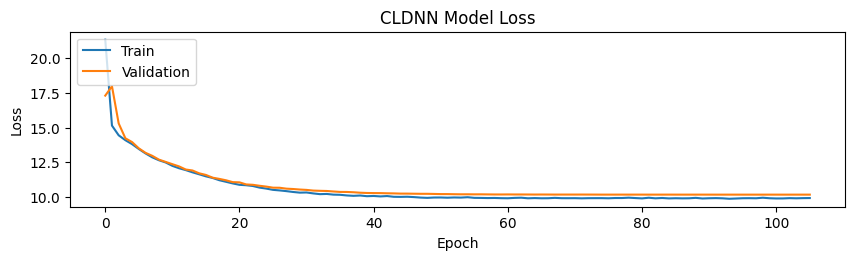


Summary of Model Performances:
CLDNN: Sequence Accuracy = 13.76%


In [20]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Dictionary of pre-trained models and their histories
pretrained_models = {
    "CLDNN": (cldnn_model, cldnn_history)
}

# Placeholder for results
results = {}

# Iterate through each pre-trained model
for model_name, (model, history) in pretrained_models.items():
    print(f"\nEvaluating Model: {model_name}\n" + "=" * 50)

    # Generate raw predictions (logits) from the pre-trained model
    logits = model.predict(X_test)
    print(f"Logits shape: {logits.shape}")  # Expected shape: (batch_size, time_steps, num_classes)

    # Use CTC greedy decoder to convert logits to sequences
    decoded_predictions, _ = tf.nn.ctc_greedy_decoder(
        tf.transpose(logits, [1, 0, 2]),  # Transpose for time-major format
        tf.fill([tf.shape(logits)[0]], tf.shape(logits)[1])  # Input length
    )

    # Convert the sparse tensor to dense format
    dense_predictions = tf.sparse.to_dense(decoded_predictions[0], default_value=0)

    # Convert from numeric indices to characters using `num_to_char` mapping
    predicted_texts = [
        ''.join(num_to_char(index).numpy().decode('utf-8') for index in prediction if index > 0)
        for prediction in dense_predictions
    ]

    # Display a few predictions
    print("\nSample Predictions:")
    for i, pred in enumerate(predicted_texts[:5]):
        print(f"Prediction {i+1}: {pred}")

    # Convert y_test (true labels) back to readable text
    true_texts = [
        ''.join(num_to_char(index).numpy().decode('utf-8') for index in label if index > 0)
        for label in y_test
    ]

    # Display a few comparisons
    print("\nSample True vs. Predicted Comparisons:")
    for i in range(5):
        print(f"True: {true_texts[i]} | Predicted: {predicted_texts[i]}")

    # Calculate sequence accuracy
    sequence_accuracy = sum([1 for true, pred in zip(true_texts, predicted_texts) if true == pred]) / len(true_texts)
    print(f"\nSequence Accuracy for {model_name}: {sequence_accuracy * 100:.2f}%")

    # Store results
    results[model_name] = sequence_accuracy

    # Plot model loss
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Summary of all model performances
print("\nSummary of Model Performances:\n" + "=" * 50)
for model_name, accuracy in results.items():
    print(f"{model_name}: Sequence Accuracy = {accuracy * 100:.2f}%")

# **CTC Decode With `pyctcdecode`**

In [ ]:
!pip install pyctcdecode
!pip install https://github.com/kpu/kenlm/archive/master.zip
import kenlm
from pyctcdecode import build_ctcdecoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 9.9 MB/s eta 0:00:00
     - 553.6 kB 9.2 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for kenlm: filename=kenlm-0.2.0-cp311-cp311-linux_x86_64.whl size=3186569 sha256=a2080144bc22fdc6d3cc2bc3bbbc79ae57369d01db5c0c3bca72767189062ec1
  Stored in directory: /tmp/pip-ephem-wheel-cache-ddh4zq_7/wheels/4e/ca/6a/e5da175b1396483f6f410cdb4cfe8bc8fa5e12088e91d60413
Successfully built kenlm


In [ ]:
kenlm_model_path = 'test.arpa'
decoder = build_ctcdecoder(
    char_to_num.get_vocabulary(),
    kenlm_model_path=kenlm_model_path,
    alpha=0.5,
    beta=1.0
)
logits = cldnn_model.predict(X_test)

corrects = 0
incorrects = 0
for logit, actual in zip(logits, y_test):
    text = decoder.decode(logit)
    actual = ''.join(num_to_char(index).numpy().decode('utf-8') for index in actual if index > 0)
    print(f"Predicted: {text}, Actual: {actual}")
    print("Correct!") if text[0] == actual else print("---")
    corrects += 1 if text[0] == actual else 0
    incorrects += 1 if text[0] != actual else 0

print(f"Correct: {corrects}, Incorrect: {incorrects}, Accuracy: {corrects / (corrects + incorrects) * 100:.2f}%")


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted: J-, Actual: W
---
Predicted: 5-, Actual: x
---
Predicted: M-, Actual: f
---
Predicted: 5-, Actual: j
---
Predicted: 0-, Actual: I
---
Predicted: j-, Actual: c
---
Predicted: M-, Actual: S
---
Predicted: Z-, Actual: p
---
Predicted: a-, Actual: g
---
Predicted: T-, Actual: Y
---
Predicted: L-, Actual: s
---
Predicted: q-, Actual: z
---
Predicted: e-, Actual: D
---
Predicted: M-, Actual: f
---
Predicted: q-, Actual: E
---
Predicted: J-, Actual: L
---
Predicted: Z-, Actual: 0
---
Predicted: S-, Actual: -
---
Predicted: A-, Actual: A
Correct!
Predicted: 7-, Actual: B
---
Predicted: c-, Actual: i
---
Predicted: z-, Actual: 3
---
Predicted: J-, Actual: G
---
Predicted: y-, Actual: V
---
Predicted: S-, Actual: 4
---
Predicted: S-, Actual: i
---
Predicted: f-, Actual: Q
---
Predicted: D-, Actual: V
---
Predicted: t-, Actual: 3
---
Predicted: Z-, Actual: m
---
Predicted: b-, Actual: d
---
Predicted: d-, Actual: W
---
Predicted: q-, Actual: b
---

# **CTC Decode With `speechbrain.decoders.ctc`**

In [ ]:
# Install SpeechBrain if not already installed
!pip install speechbrain
!pip install https://github.com/kpu/kenlm/archive/master.zip

import numpy as np
import torch
from speechbrain.decoders.ctc import ctc_greedy_decode, filter_ctc_output

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 139.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Assuming logits are generated from the CLDNN model
logits = cldnn_model.predict(X_test)
logits_tensor = torch.tensor(logits)

# Define blank index (assuming the last index in vocabulary is used for blank)
blank_index = 0

# Sequence lengths (assuming they are fully used)
seq_lens = torch.ones(logits_tensor.shape[0])  # All sequences are full-length in this example

# Perform greedy CTC decoding
decoded_sequences = ctc_greedy_decode(logits_tensor, seq_lens, blank_id=blank_index)

# Apply CTC output filtering to remove blanks and repetitions
filtered_sequences = [filter_ctc_output(seq, blank_id=blank_index) for seq in decoded_sequences]

corrects = 0
incorrects = 0
# Convert numerical output to text
for logit, actual, decoded, filtered in zip(logits, y_test, decoded_sequences, filtered_sequences):
    predicted_text = "".join(num_to_char(index).numpy().decode("utf-8") for index in filtered if index > 0)
    actual_text = "".join(num_to_char(index).numpy().decode("utf-8") for index in actual if index > 0)

    print(f"Predicted: {predicted_text}, Actual: {actual_text}")
    print("Correct!") if predicted_text == actual_text else print("---")
    corrects += 1 if predicted_text == actual_text else 0
    incorrects += 1 if predicted_text != actual_text else 0

print(f"Correct: {corrects}, Incorrect: {incorrects}, Accuracy: {corrects / (corrects + incorrects) * 100:.2f}%")


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted: F, Actual: W
---
Predicted: G, Actual: x
---
Predicted: f, Actual: f
Correct!
Predicted: G, Actual: j
---
Predicted: t, Actual: I
---
Predicted: c, Actual: c
Correct!
Predicted: f, Actual: S
---
Predicted: O, Actual: p
---
Predicted: I, Actual: g
---
Predicted: Y, Actual: Y
Correct!
Predicted: z, Actual: s
---
Predicted: b, Actual: z
---
Predicted: D, Actual: D
Correct!
Predicted: f, Actual: f
Correct!
Predicted: b, Actual: E
---
Predicted: F, Actual: L
---
Predicted: O, Actual: 0
---
Predicted: X, Actual: -
---
Predicted: h, Actual: A
---
Predicted: q, Actual: B
---
Predicted: -, Actual: i
---
Predicted: H, Actual: 3
---
Predicted: F, Actual: G
---
Predicted: U, Actual: V
---
Predicted: X, Actual: 4
---
Predicted: X, Actual: i
---
Predicted: l, Actual: Q
---
Predicted: M, Actual: V
---
Predicted: v, Actual: 3
---
Predicted: O, Actual: m
---
Predicted: d, Actual: d
Correct!
Predicted: B, Actual: W
---
Predicted: b, Actual: b
Correct!
Pr

In [ ]:
import torch
from speechbrain.decoders.ctc import CTCPrefixBeamSearcher

# Path to KenLM language model
kenlm_model_path = 'test.arpa'

# Create CTC Prefix Beam Search decoder with LM integration
decoder = CTCPrefixBeamSearcher(
    blank_index=0,  # Assuming blank token is the last index
    vocab_list=char_to_num.get_vocabulary(),  # Pass the vocabulary list directly
    space_token='-',  # Define space token
    kenlm_model_path=kenlm_model_path,  # Enable LM usage
    alpha=0.5,  # LM weight (higher values prioritize LM influence)
    beta=1.5,   # Length normalization factor
    beam_size=100,  # Beam width
)
logits = cldnn_model.predict(X_test)

corrects = 0
incorrects = 0
for logit, actual in zip(logits, y_test):
    # Pass logit as a torch.Tensor with added batch dimension
    # Reshape logit to (1, time_steps, num_classes) for batch_size = 1
    logit_tensor = torch.tensor(logit).unsqueeze(0)

    text = decoder.decode_beams(logit_tensor)[0][0].text
    actual = ''.join(num_to_char(index).numpy().decode('utf-8') for index in actual if index > 0)
    print(f"Predicted: {text}, Actual: {actual}")
    print("Correct!") if text == actual else print("---")
    corrects += 1 if text == actual else 0
    incorrects += 1 if text != actual else 0

print(f"Correct: {corrects}, Incorrect: {incorrects}, Accuracy: {corrects / (corrects + incorrects) * 100:.2f}%")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted: a, Actual: W
---
Predicted: a, Actual: x
---
Predicted: i, Actual: f
---
Predicted: a, Actual: j
---
Predicted: a, Actual: I
---
Predicted: i, Actual: c
---
Predicted: i, Actual: S
---
Predicted: a, Actual: p
---
Predicted: a, Actual: g
---
Predicted: a, Actual: Y
---
Predicted: a, Actual: s
---
Predicted: a, Actual: z
---
Predicted: a, Actual: D
---
Predicted: i, Actual: f
---
Predicted: a, Actual: E
---
Predicted: a, Actual: L
---
Predicted: a, Actual: 0
---
Predicted: , Actual: -
---
Predicted: , Actual: A
---
Predicted: i, Actual: B
---
Predicted: a, Actual: i
---
Predicted: i, Actual: 3
---
Predicted: a, Actual: G
---
Predicted: a, Actual: V
---
Predicted: , Actual: 4
---
Predicted: , Actual: i
---
Predicted: i, Actual: Q
---
Predicted: i, Actual: V
---
Predicted: i, Actual: 3
---
Predicted: a, Actual: m
---
Predicted: a, Actual: d
---
Predicted: a, Actual: W
---
Predicted: a, Actual: b
---
Predicted: a, Actual: m
---
Predicted: , 